In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
time_table_file = 'time_results.txt'

with open(time_table_file, 'r') as f:
    flines = [l.rstrip().split(', ') for l in f]

flines = [[int(n) if i == 0 else float(n) for i, n in enumerate(line)] for line in flines[1:]]

n, numpy_time, pytorch_time, numba_time, parallel_numba_time, cuda_numba_time, c_time, parallel_c_time = [
        [flines[k][i] for k in range(len(flines))]
        for i in range(len(flines[0]))
]

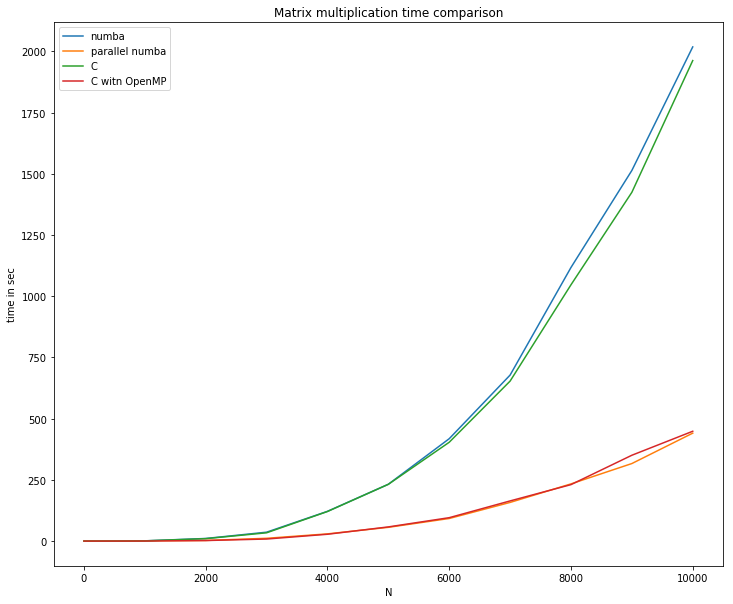

In [8]:
plt.figure(figsize=(12, 10))

# plt.plot(n, numpy_time, label='numpy')
plt.plot(n, numba_time, label='numba')
plt.plot(n, parallel_numba_time, label='parallel numba')
# plt.plot(n, cuda_numba_time, label='numba with CUDA')
plt.plot(n, c_time, label='C')
plt.plot(n, parallel_c_time, label='C witn OpenMP')

plt.xlabel('N')
plt.ylabel('time in sec')

plt.legend()
plt.title('Matrix multiplication time comparison')

plt.savefig('mm_time_comparison.png', dpi=1500, transparent=True)

plt.show()